<a href="https://colab.research.google.com/github/alupo933/Project-2/blob/main/Project_2_Part_3_Further_Exploration_of_Wine_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from seaborn import heatmap
from sklearn import set_config
set_config(display='diagram')

In [ ]:
# Import DF
filename = '/content/drive/MyDrive/Excel/wine_data.csv'
wine = pd.read_csv(filename)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# First we are going to clean the dataset


In [ ]:
# no columns ae going to be dropped as none are unnecessary
# Next we will check from duplicated rows
wine.duplicated().sum()

240

- There are 240 duplicate rows, so we want to delete them

In [ ]:
# delete duplicate rows
wine.drop_duplicates(inplace=True)

In [ ]:
# Check to see if the code performed correctly and the duplicates were dropped
wine.duplicated().sum()

0

##check for any missing values

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- there are no missing values in the dataset

## Next we will explore the data to get an idea of the data and look for numerical irregularities.

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- There are no inconsistencies or irregularities in data that stick out

# Second, we are going to split the data into features and a target

In [ ]:
y = wine['quality']
X = wine.drop(columns='quality')

# Third, we will Create univariate visuals for the target and the features

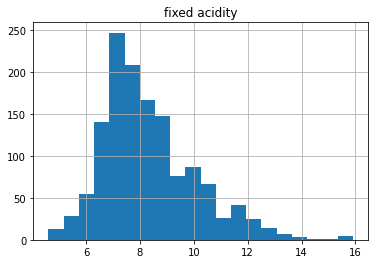

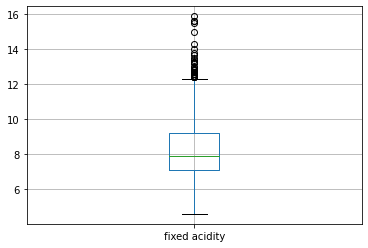

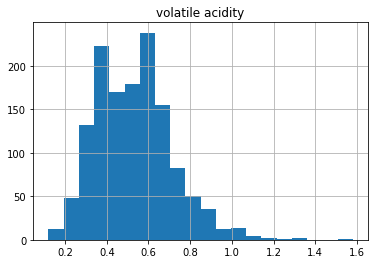

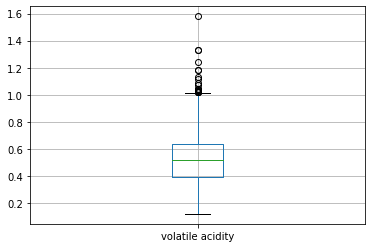

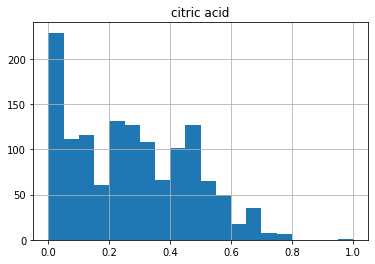

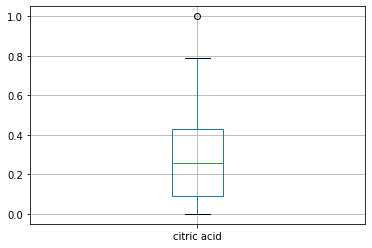

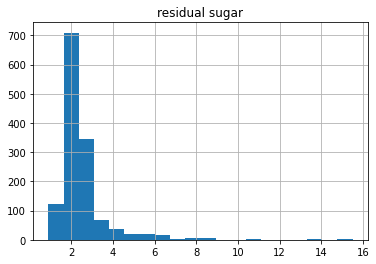

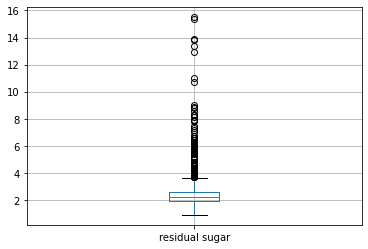

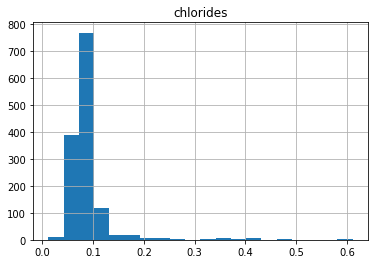

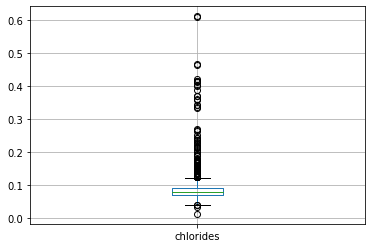

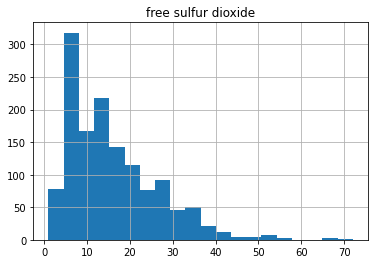

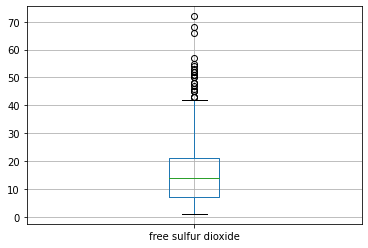

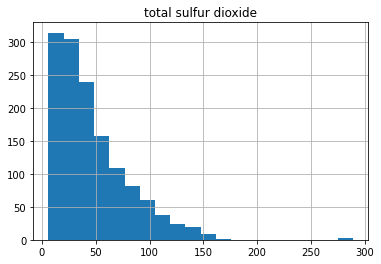

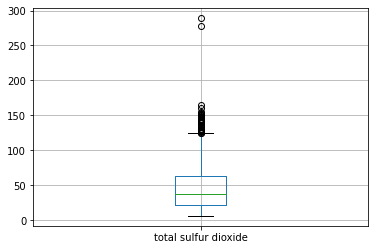

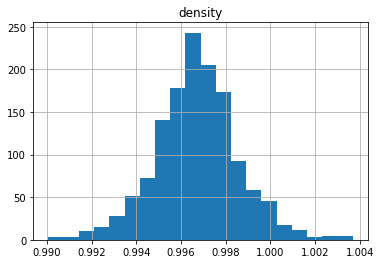

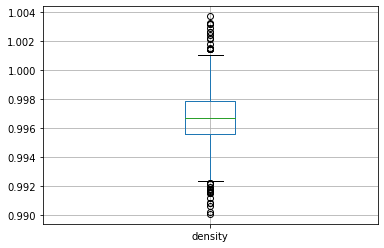

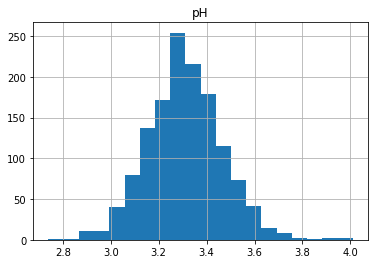

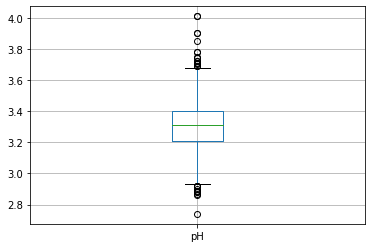

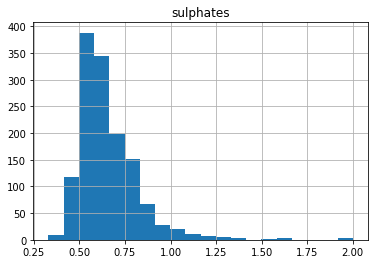

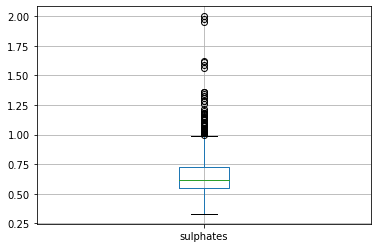

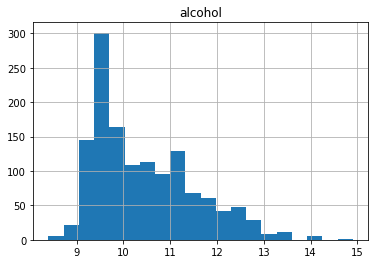

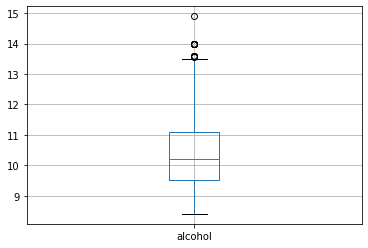

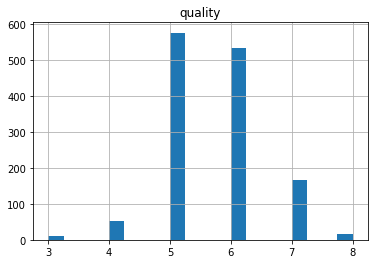

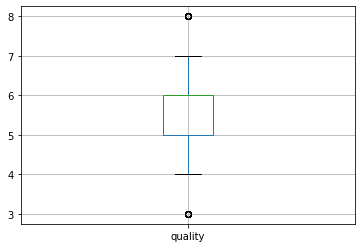

In [ ]:
# first we'll look at histograms and boxplots
number_columns = wine.select_dtypes('number').columns

for col in number_columns:
  wine.hist(column = col, bins=20)
  plt.show()
  wine.boxplot(column = col)
  plt.show()

##From these exploratory graphs we can see in the FEATURE Columns:

1) Volatile Acidity has outliers above 1.0 up to 1.6

2) Fixed Acidity has outliers from 12.2 up to 16

3) Citric Acid has one outlier at 1.0

4) Residual Sugar has many outliers that start at ~3.8 and increase in number

5) Chlorides have many outliers as well that range from 0.15 and up

6) Free sulfer dioxid has a few outliers from about 42-75.

7) Total Sulfer Dioxide has about 2 outliers at about 280

8) Density of the Wines is mainly in the range of .992 to 1.001 with outliers both higher and lower

9) pH of the wine ranges mostley between 2.9 and 3.7 with outliers higher and lower

10) sulfates in the wine are mostly in the range of 0.25 to 1.00 and have some outliers up to 2.00

11) The Alcohol percentage of the wines fal in the range of 8.5%-13.5% with a few outliers on the higher end up to 15%.

Features 1-7, 10 & 11 are all negatively skewed.

## In the TARGET Column (Quality)
- We can see the quality of the wines range from 4-7 with some outliers at 3 & 8. The majority of the wines have a quality score of 5 & 6.

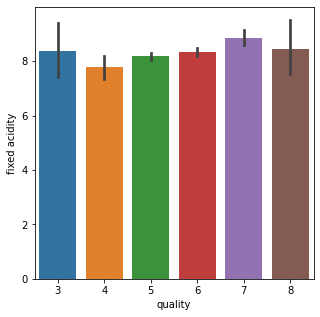

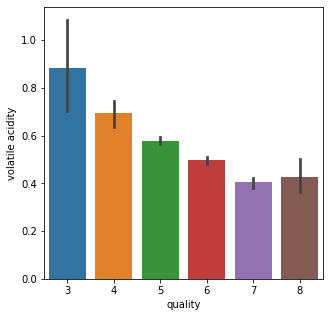

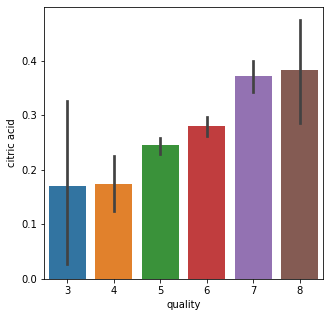

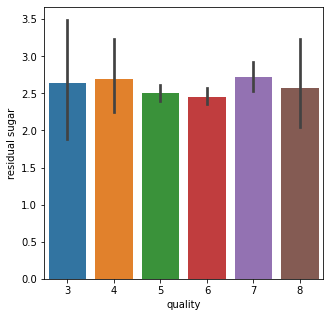

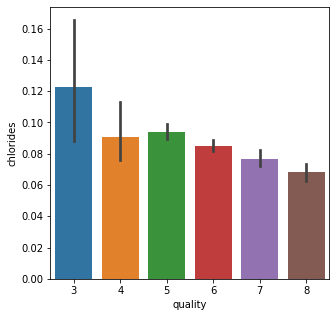

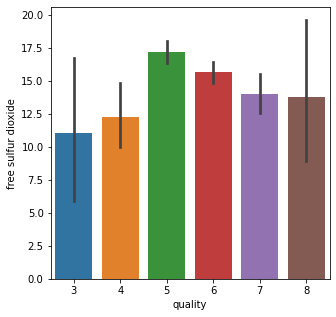

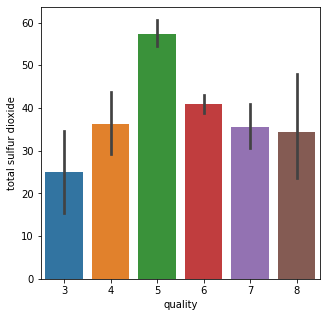

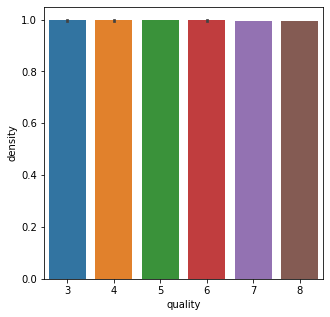

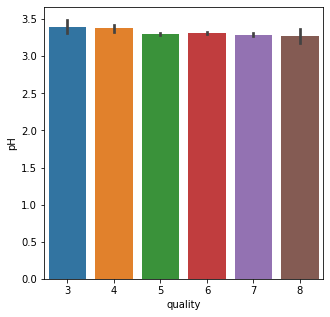

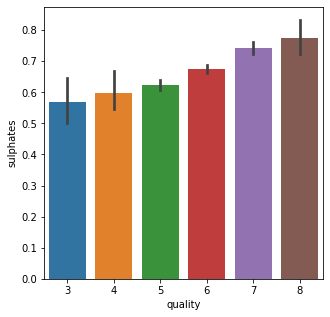

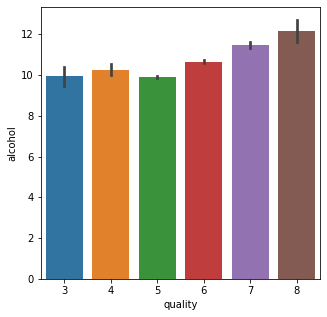

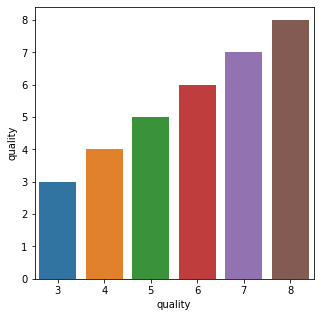

In [ ]:
for feature in wine:
  fig = plt.figure(figsize=(5,5))
  sns.barplot(x = wine['quality'], y = feature , data = wine)
  plt.show()

From these bargraphs, we can see that clhorides decrease as the quality of wine goes up, citric acid increase as the quality of wine goes up, and volatile acidity goes down as the quality of wine goes up. Sulphates increase with the quality of the wine, and alcohol % tends to increase with the quality of the wine.

#Next We will make a correlation heatmap and identify any moderate or strong correlations between any of the features or the target and the features:

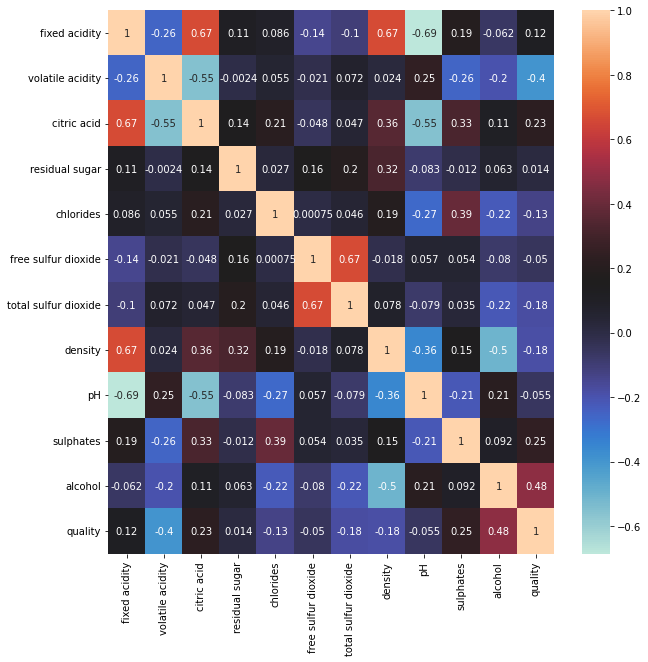

In [ ]:
winecorr = wine.corr()
plt.figure(figsize=(10,10))
sns.heatmap(winecorr, cmap='icefire', annot=True);

There seems to minimal correlation between alcohol and quality, at 0.48, making it the strongest of the correlations between a feature and the target.

There seems to be a strong correlation between:
- density and fixed acidity (0.67)
- citric acid and fixed acidity (0.67)
- pH and fixed acidity (-0.69) (negative Correlation)

There is a negative correlation between:
- fixed acidity & volatile acidity (-0.26)
- fixed acidity & free sulfur dioxide (-0.14)
- fixed acidity & total sulfur dioxide (-0.1)
- fixed acidity & pH (-0.69), this is a strong negative correlation
- fixed acidity & alcohol (-0.062)
- volatile acidity & citric acide (-0.55) strong
- citric acid & pH (-0.55) strong
- alcohol & density (-0.5)

Now we'll look at the one's with strong correlations through scaterplots

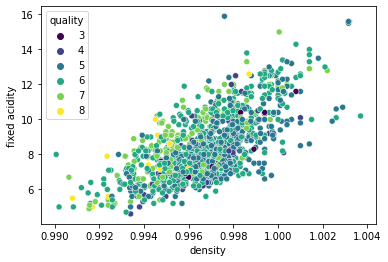

In [ ]:
sns.scatterplot(data=wine, x = 'density', y = 'fixed acidity', hue = 'quality', palette ='viridis' );

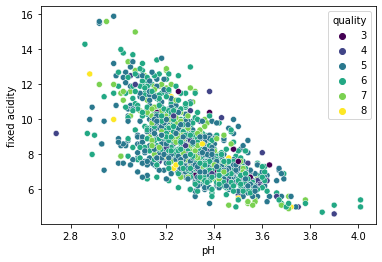

In [ ]:
sns.scatterplot(data=wine, x = 'pH', y = 'fixed acidity', hue = 'quality', palette = 'viridis' );

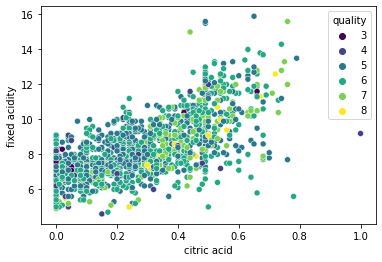

In [ ]:
sns.scatterplot(data=wine, x = 'citric acid', y = 'fixed acidity', hue = 'quality', palette = 'viridis');

Let's look at all the different correlations, both strong and weak through scatterplots with quality being observed.

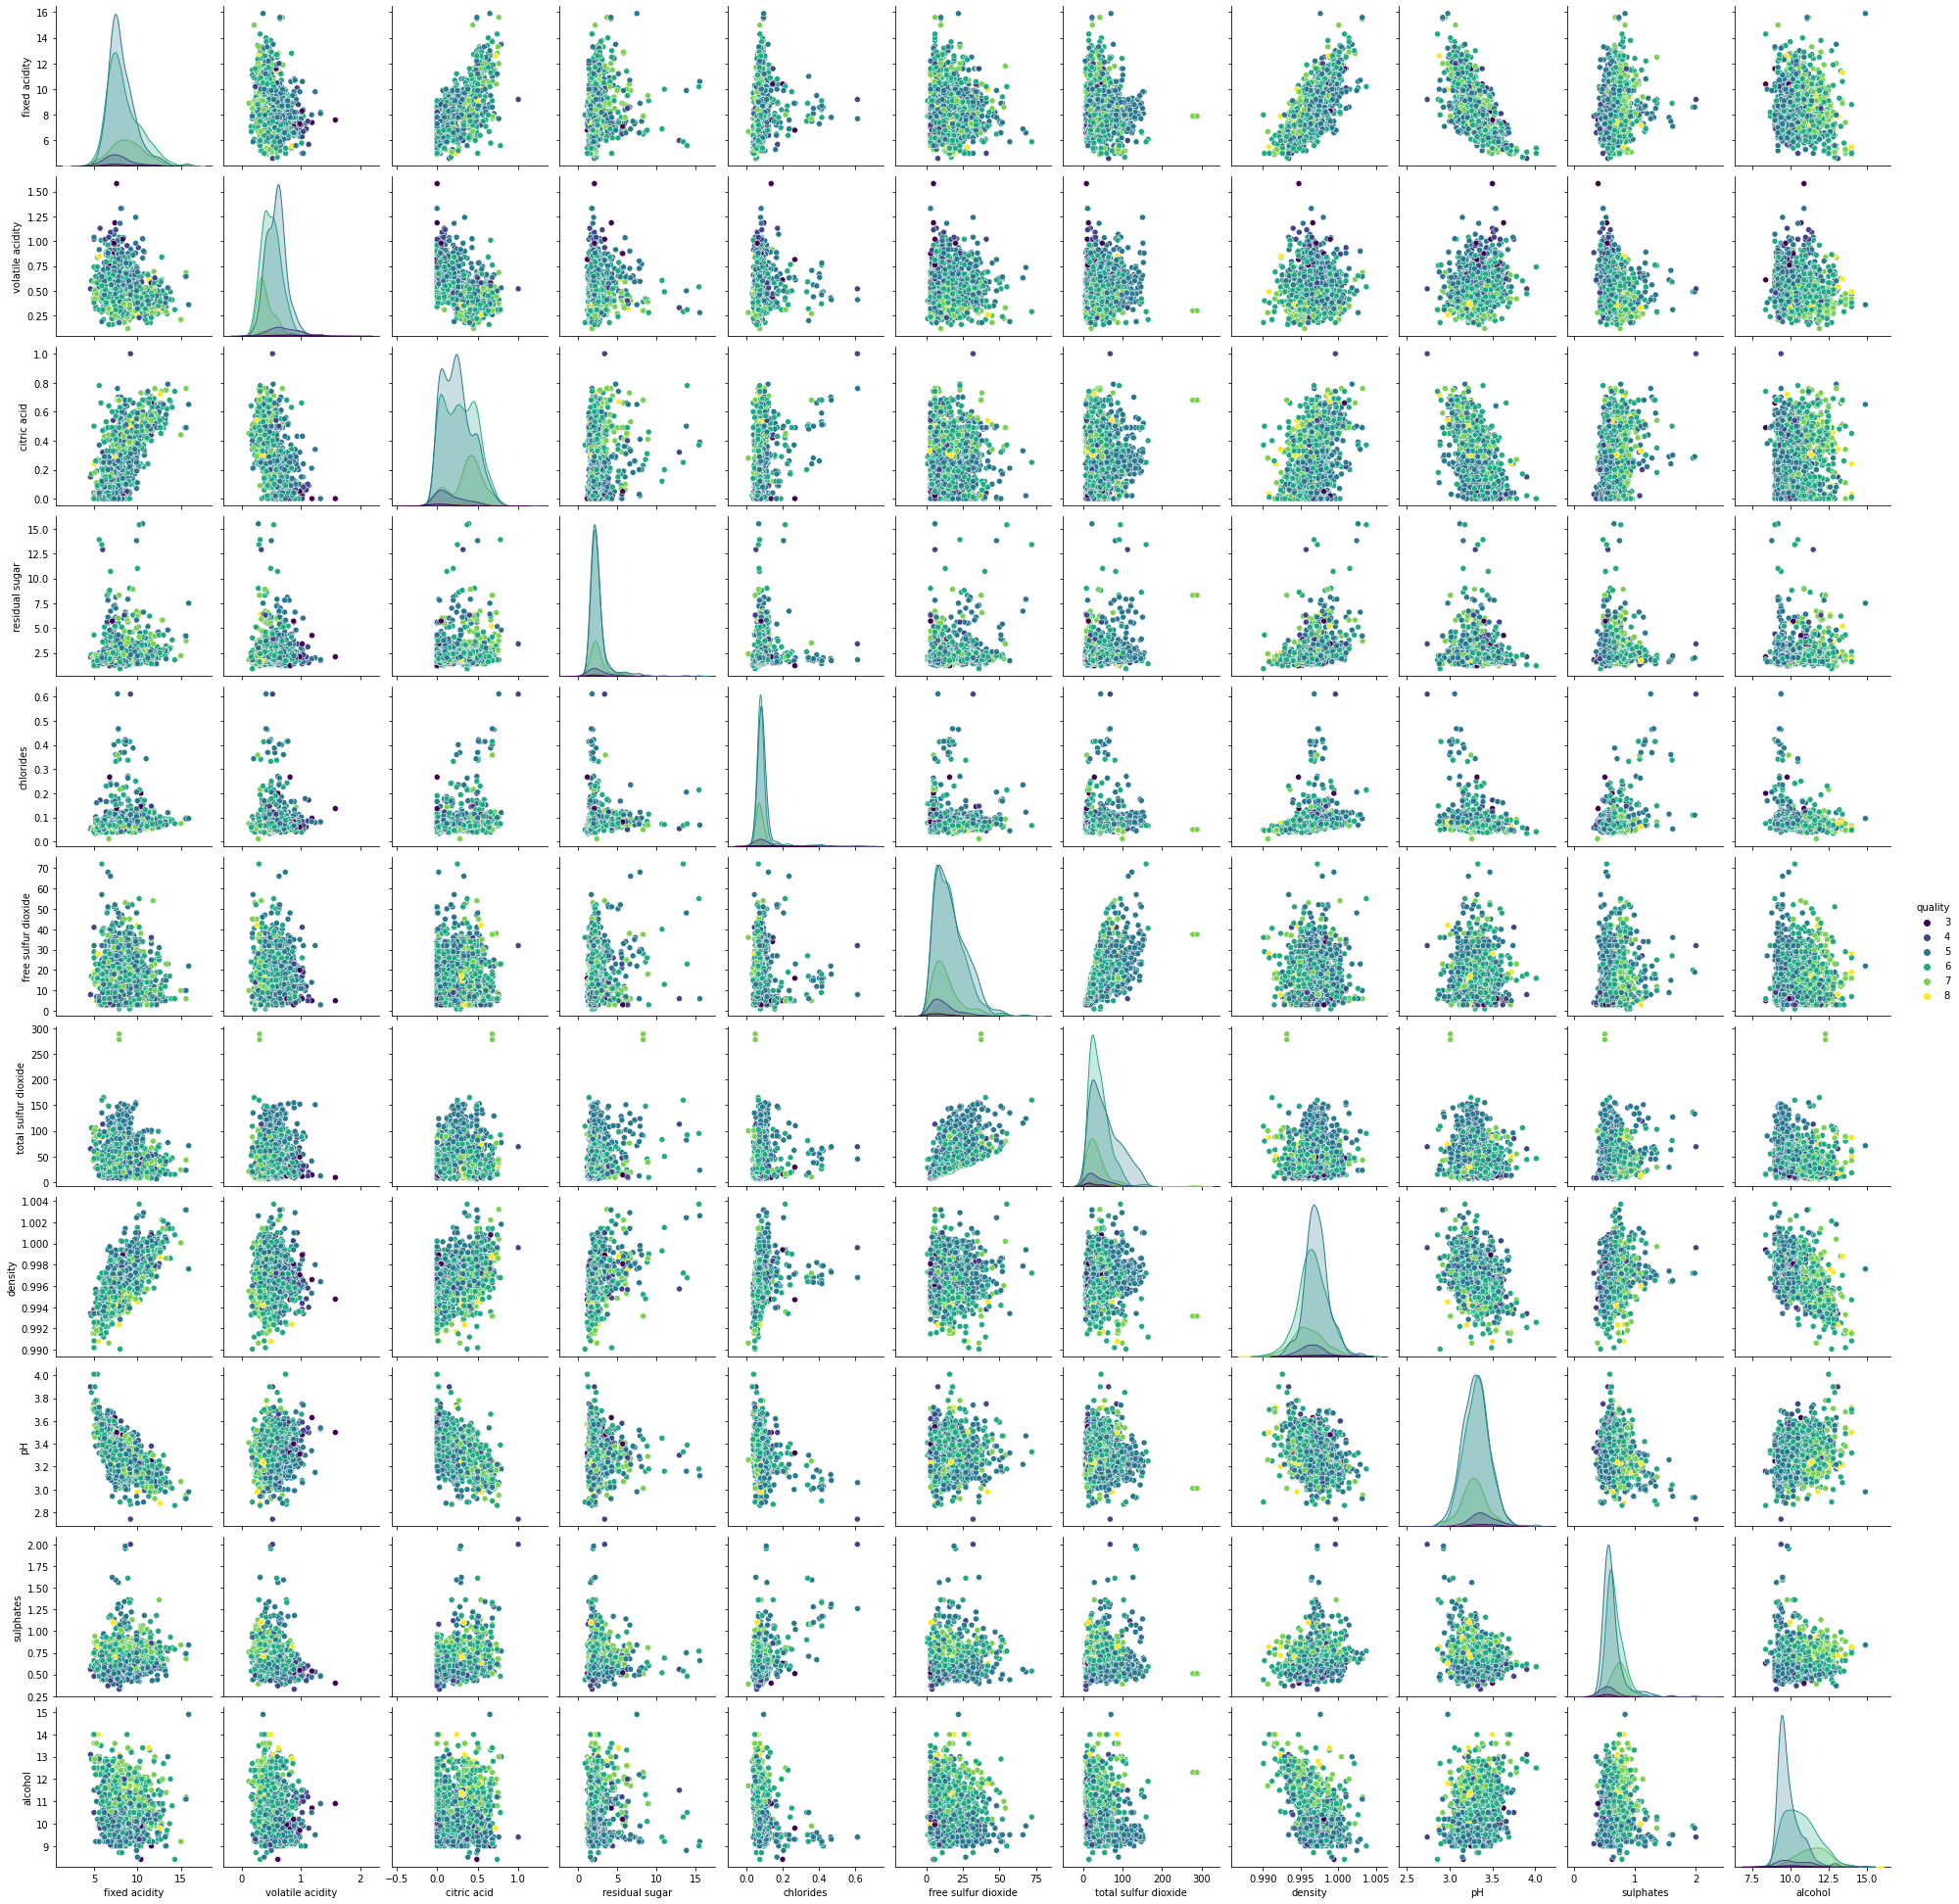

In [ ]:
sns.pairplot(wine.iloc[:,], hue = 'quality', palette= 'viridis')
plt.show;